### Notebook Setup (Imports and Declarations)

In [43]:
import os
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [201]:
FLOAT_PATTERN = r"^-?\d+\.\d+$"

TEAM_DICT = {'CSK' : 'Chennai Super Kings',
              'DC' : 'Delhi Capitals',
              'GT' : 'Gujarat Titans',
              'KKR' : 'Kolkata Knight Riders',
              'LSG' : 'Lucknow Super Giants',
              'MI' : 'Mumbai Indians',
              'PBKS' : 'Punjab Kings',
              'RCB' : 'Royal Challengers Bengaluru',
              'RR' : 'Rajasthan Royals',
              'SRH' : 'Sunrisers Hyderabad'
              }

SEASON_FIX = {"2007/08" : "2008",
              "2009/10" : "2010",
              "2020/21" : "2020"
              }

TEAM_FULLN ={"Royal Challengers Bangalore":"Royal Challengers Bengaluru",
             "Punjab Kings":"Kings XI Punjab",
             "Deccan Chargers":"Sunrisers Hyderabad",
             "Delhi Daredevils":"Delhi Capitals",
             "Gujarat Lions":"Gujarat Titans",
             "Rising Pune Supergiant":"Pune Warriors",
             "Rising Pune Supergiants":"Pune Warriors"
             }

PLAYER_FIX ={"Virat Kohli" : "V Kohli",
             "Rajat Patidar": "RM Patidar",
             "Rinku Singh" : "RK Singh",
             "Varun Chakravarthy" : "CV Varun",
             "Sunil Narine" : "SP Narine",
             "Andre Russell" : "AD Russell",
             "Liam Livingstone" : "LS Livingstone",
             "Devdutt Padikkal" : "D Padikkal",
             "Venkatesh Iyer" : "VS Iyer",
             "Quinton de Kock" : "Q de Kock",
             "Phil Salt" : "PD Salt",
             "Jitesh Sharma" : "JM Sharma",
             "Josh Hazlewood" : "JR Hazlewood",
             "Anrich Nortje" : "A Nortje",
             "Angkrish Raghuvanshi" : "A Raghuvanshi",
             "Vaibhav Arora" : "VG Arora",
             "Mayank Markande" : "M Markande",
             "Rovman Powell" : "R Powell",
             "Ajinkya Rahane" : "AM Rahane",
             "Krunal Pandya" : "KH Pandya",
             "Bhuvneshwar Kumar" : "B Kumar",
             "Manish Pandey" : "MK Pandey",
             "Moeen Ali" : "MM Ali",
             "Tim David" : "TH David",
             "Romario Shepherd" : "R Shepherd",
             "Spencer Johnson" : "SH Johnson",
             "Nuwan Thushara" : "N Thushara",
             "Lungi Ngidi" : "L Ngidi",
             "Abhinandan Singh" : "A Singh"
             }

### Data : Auction 2025

In [108]:
auction25 = pd.read_csv("../data/kaggle/auction_2025/ipl_2025_auction_players.csv")
auction25["sold_status"] = auction25["Sold"].apply(lambda x : "sold" if re.match(FLOAT_PATTERN, x) else x)

auction25.head(3)


,Players,Team,Type,Base,Sold,sold_status
0,Virat Kohli,RCB,BAT,-,21.00,sold
1,Rajat Patidar,RCB,BAT,-,11.00,sold
2,Yash Dayal,RCB,BOWL,-,5.00,sold


In [109]:
auction25.groupby(["sold_status", "Team"]).count()["Players"].reset_index().pivot(index="sold_status", columns="Team", values="Players").fillna(0)

Team,-,CSK,DC,GT,KKR,LSG,MI,PBKS,RCB,RR,SRH
sold_status,,,,,,,,,,,
TBA,293.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unsold,102.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
sold,0.0,25.0,23.0,25.0,21.0,23.0,23.0,25.0,22.0,20.0,20.0


**Note:**
- DC has one extra sold player: "Harry Brook"
- Unsold in LSG has been verified to be sold
- It would probably be a good idea to make above changes and keep sold player's info as it is the final squad.

In [110]:
# modifications required after data verification

auction25 = auction25[auction25["Players"]!="Harry Brook"].copy()

auction25["Sold"] = auction25.apply(lambda x: "0.3" if (x["Team"]=="LSG" and x["Sold"]=="Unsold") else x["Sold"], axis=1)
auction25["sold_status"] = auction25["Sold"].apply(lambda x : "sold" if re.match(FLOAT_PATTERN, x) else x)

auction25.groupby(["sold_status", "Team"]).count()["Players"].reset_index().pivot(index="sold_status", columns="Team", values="Players").fillna(0)

Team,-,CSK,DC,GT,KKR,LSG,MI,PBKS,RCB,RR,SRH
sold_status,,,,,,,,,,,
TBA,293.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unsold,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sold,0.0,25.0,22.0,25.0,21.0,24.0,23.0,25.0,22.0,20.0,20.0


In [111]:
auction25_cleaned = auction25[auction25["sold_status"]=="sold"].drop("sold_status", axis=1).astype({"Sold":float}).copy()
print("Auction Data(original and cleaned) : ", auction25.shape, auction25_cleaned.shape)
auction25_cleaned.head(3)

Auction Data(original and cleaned) :  (622, 6) (227, 5)


,Players,Team,Type,Base,Sold
0,Virat Kohli,RCB,BAT,-,21.0
1,Rajat Patidar,RCB,BAT,-,11.0
2,Yash Dayal,RCB,BOWL,-,5.0


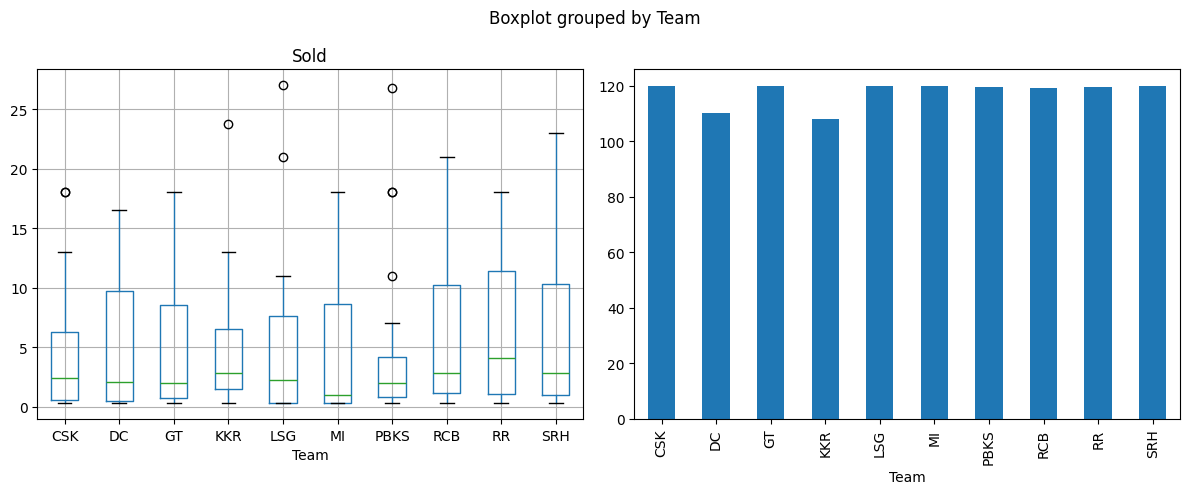

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

auction25_cleaned.boxplot(column="Sold", by="Team", ax=ax[0])

auction25_cleaned.groupby("Team")["Sold"].sum().plot.bar(ax=ax[1])

plt.tight_layout()
plt.show()

In [113]:
auction25_cleaned["Team_Name"] = auction25_cleaned["Team"].apply(lambda x: TEAM_DICT.get(x))
auction25_cleaned.head(3)

,Players,Team,Type,Base,Sold,Team_Name
0,Virat Kohli,RCB,BAT,-,21.0,Royal Challengers Bengaluru
1,Rajat Patidar,RCB,BAT,-,11.0,Royal Challengers Bengaluru
2,Yash Dayal,RCB,BOWL,-,5.0,Royal Challengers Bengaluru


In [115]:
auction25_cleaned.to_csv("../data/processed/auction25.csv", index=False)

### Data : Matches (2008 - 2024)

In [192]:
matches = pd.read_csv("../data/kaggle/all_seasons_concise/matches.csv")

matches["season"] = matches["season"].apply(lambda x: SEASON_FIX.get(x) if x in SEASON_FIX.keys() else x)
matches["team1"] = matches["team1"].apply(lambda x: TEAM_FULLN.get(x) if x in TEAM_FULLN.keys() else x)
matches["team2"] = matches["team2"].apply(lambda x: TEAM_FULLN.get(x) if x in TEAM_FULLN.keys() else x)
matches["toss_winner"] = matches["toss_winner"].apply(lambda x: TEAM_FULLN.get(x) if x in TEAM_FULLN.keys() else x)
matches["winner"] = matches["winner"].apply(lambda x: TEAM_FULLN.get(x) if x in TEAM_FULLN.keys() else x)

matches.to_csv("../data/processed/matches.csv", index=False)
matches.head(3)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bengaluru,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar


<Axes: xlabel='player_of_match'>

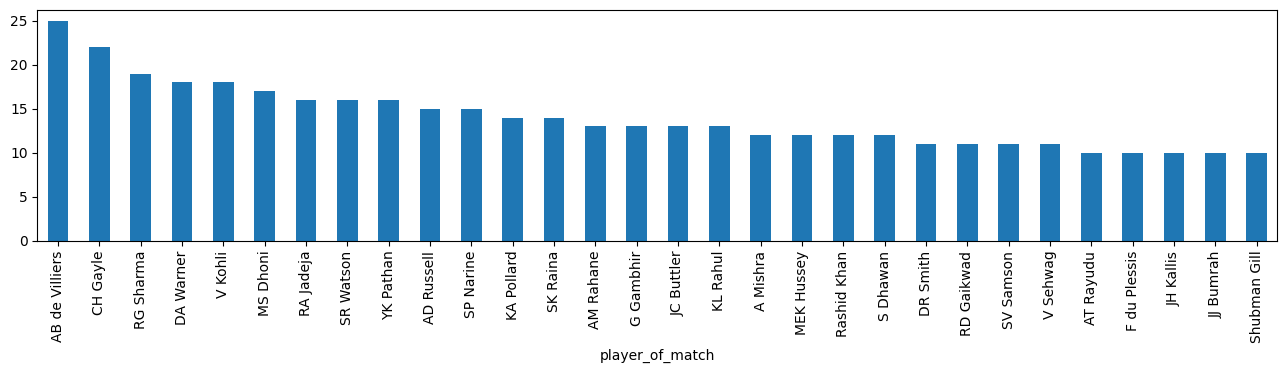

In [193]:
plt.figure(figsize=(16,3))
matches.groupby(["player_of_match"])['id'].count().nlargest(30).plot.bar()

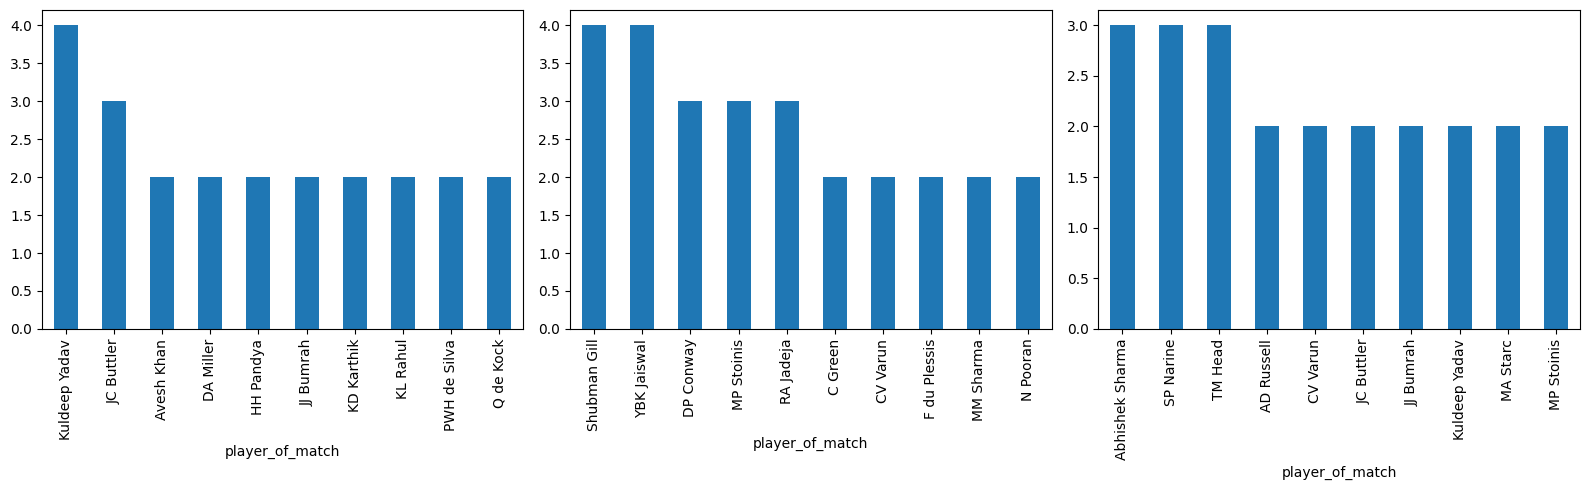

In [194]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))

matches[matches["season"]=="2022"].groupby(["player_of_match"])['id'].count().nlargest(10).plot.bar(ax=ax[0])
matches[matches["season"]=="2023"].groupby(["player_of_match"])['id'].count().nlargest(10).plot.bar(ax=ax[1])
matches[matches["season"]=="2024"].groupby(["player_of_match"])['id'].count().nlargest(10).plot.bar(ax=ax[2])

plt.tight_layout()
plt.show()

**Note:** It would be a good idea to know how many times players in current squad have won "player_of_match" award in recent seasons. This will suggest the likely performers of current matches.

In [195]:
# generate pom summary
pom_data = matches.groupby(["player_of_match", "season"], sort=True)['id'].count().reset_index().rename(columns={'id':'pom_s1count'})


# add missing seasons
data = {
    "mergecol": 1,
    "player_of_match": list(pom_data["player_of_match"].unique())
}
dummy_playerdata = pd.DataFrame(data)

data = {
    "mergecol": 1,
    "season": list(range(2008,2024,1))
}
dummy_seasondata = pd.DataFrame(data)

allplayer_seasons = dummy_playerdata.merge(dummy_seasondata, on="mergecol", how="outer").drop("mergecol", axis=1).astype({"season": str})

pom_data_v2 = allplayer_seasons.merge(pom_data, on=["player_of_match", "season"], how="left").fillna(0)


# moving sum of pom count for past 3 seasons

pom_data_v2["pom_s3count"] = pom_data_v2.groupby("player_of_match")["pom_s1count"].rolling(3, min_periods=1).sum().reset_index(level=0, drop=True)

pom_data_v2.to_csv("../data/processed/pom_histdata.csv", index=False)
pom_data_v2.head(3)

,player_of_match,season,pom_s1count,pom_s3count
0,A Chandila,2008,0.0,0.0
1,A Chandila,2009,0.0,0.0
2,A Chandila,2010,0.0,0.0


In [203]:
# pom data and current(2025) squad info combined to be used in tableau

auction25_cleaned = pd.read_csv("../data/processed/auction25.csv")
pom_data_v2 = pd.read_csv("../data/processed/pom_histdata.csv")
auction25_cleaned["Players"] = auction25_cleaned["Players"].apply(lambda x: PLAYER_FIX.get(x) if x in PLAYER_FIX.keys() else x)

newsquad_pom = auction25_cleaned.merge(pom_data_v2, left_on="Players", right_on="player_of_match", how="left")
newsquad_pom.to_csv("../data/processed/newsquad_pom.csv", index=False)
print(auction25_cleaned.shape, pom_data_v2.shape, newsquad_pom.shape)

(227, 6) (4656, 4) (887, 10)


In [ ]:
# current team's pom comparison

def pom_newmatch(season, team1, team2, data_squad, data_pom):
    